In [1]:
!pip install pandas
#установка pandas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#получение библиотек и присовоение им короткого имени

In [3]:
df = pd.read_csv('C:/Users/User/data/boston.csv') #загрузка данных в pandas DataFrame
df.info() #вывод информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.head() #просмотреть первые несколько строк, для лучшего понимания исходного материала

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe(include='all').T #подробная информация о атрибутах

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
df.dtypes.value_counts() #вывод количества объектов

float64    12
int64       2
dtype: int64

In [9]:
df.to_csv('regression_preprocessed.csv') #код выполнен, файл создан

# Визуализация задачи регрессии #

In [10]:
f = pd.read_csv('C:/Users/User/data/regression_preprocessed.csv')
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [12]:
print(f.dropna().shape)

(506, 15)


In [14]:
f.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>

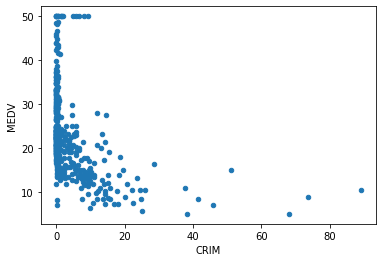

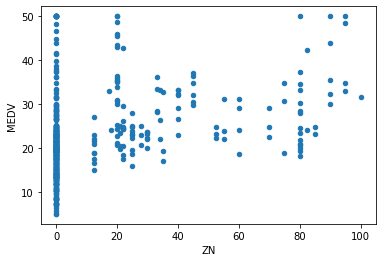

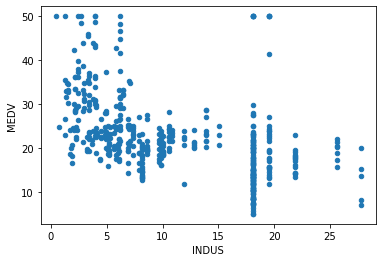

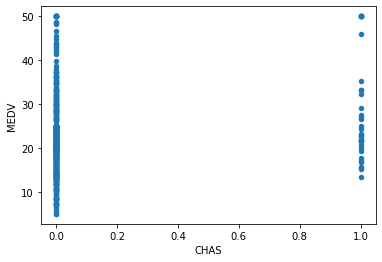

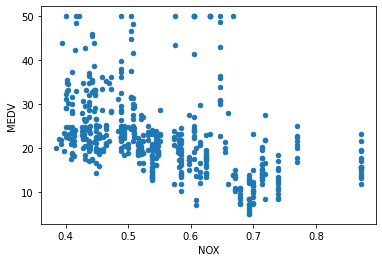

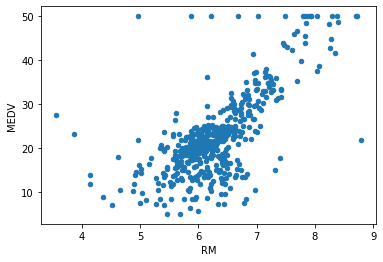

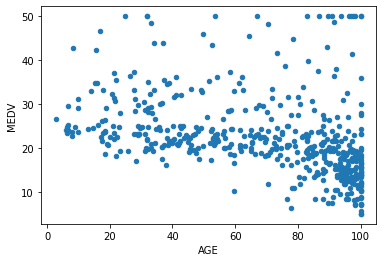

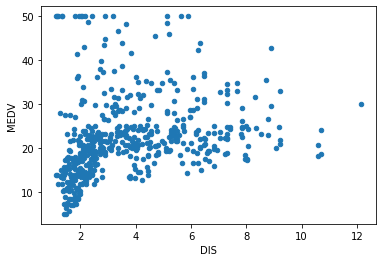

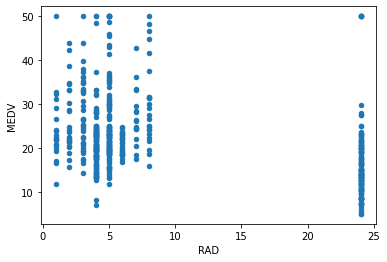

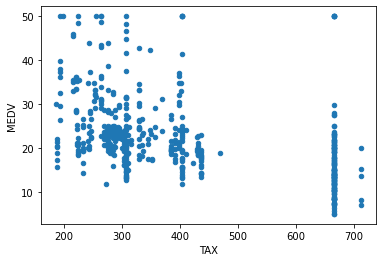

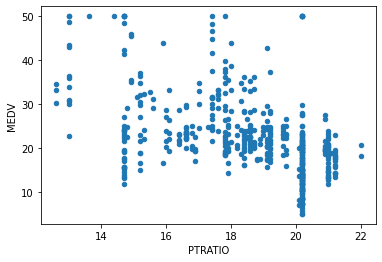

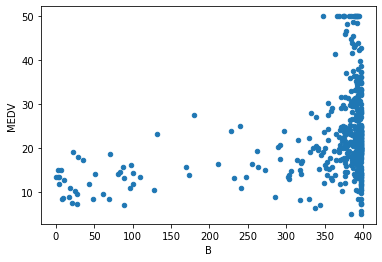

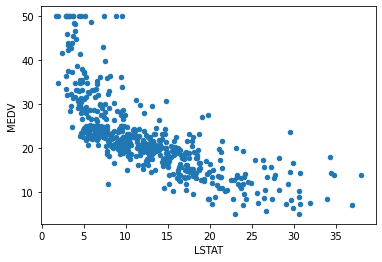

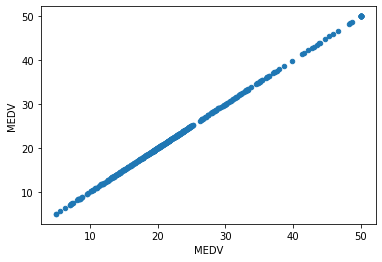

In [15]:
f.plot(x = 'CRIM', y = 'MEDV', kind = 'scatter')
f.plot(x = 'ZN', y = 'MEDV', kind = 'scatter')
f.plot(x = 'INDUS', y = 'MEDV', kind = 'scatter')
f.plot(x = 'CHAS', y = 'MEDV', kind = 'scatter')
f.plot(x = 'NOX', y = 'MEDV', kind = 'scatter')
f.plot(x = 'RM', y = 'MEDV', kind = 'scatter')
f.plot(x = 'AGE', y = 'MEDV', kind = 'scatter')
f.plot(x = 'DIS', y = 'MEDV', kind = 'scatter')
f.plot(x = 'RAD', y = 'MEDV', kind = 'scatter')
f.plot(x = 'TAX', y = 'MEDV', kind = 'scatter')
f.plot(x = 'PTRATIO', y = 'MEDV', kind = 'scatter')
f.plot(x = 'B', y = 'MEDV', kind = 'scatter')
f.plot(x = 'LSTAT', y = 'MEDV', kind = 'scatter')

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

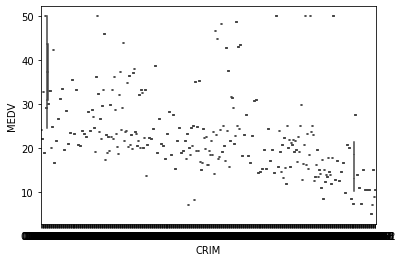

In [16]:
sns.boxplot(x = 'CRIM', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

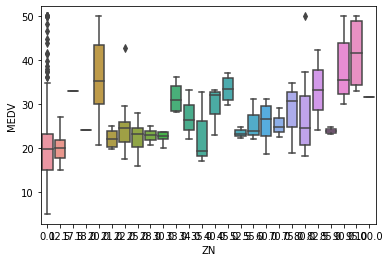

In [17]:

sns.boxplot(x = 'ZN', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='INDUS', ylabel='MEDV'>

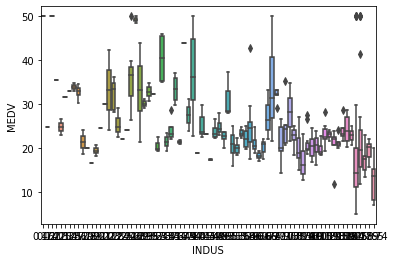

In [19]:
sns.boxplot(x = 'INDUS', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

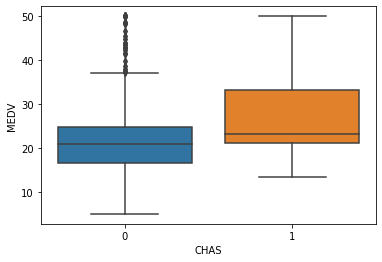

In [20]:

sns.boxplot(x = 'CHAS', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='NOX', ylabel='MEDV'>

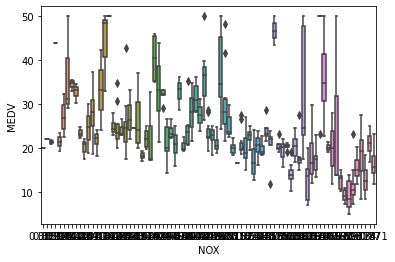

In [21]:

sns.boxplot(x = 'NOX', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

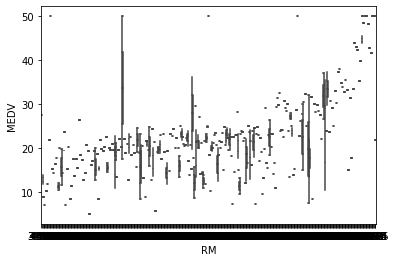

In [22]:

sns.boxplot(x = 'RM', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

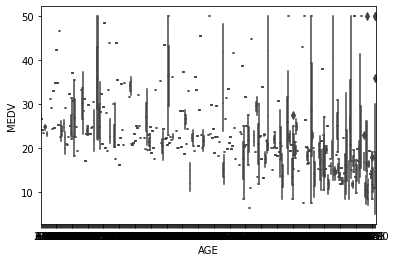

In [23]:

sns.boxplot(x = 'AGE', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

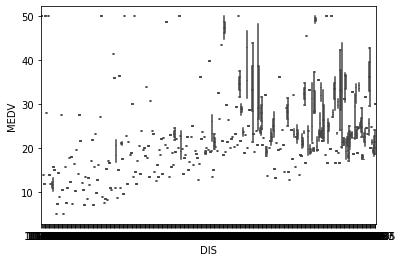

In [24]:

sns.boxplot(x = 'DIS', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='RAD', ylabel='MEDV'>

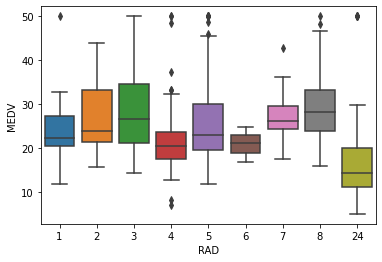

In [25]:

sns.boxplot(x = 'RAD', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

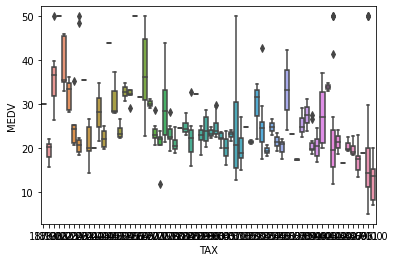

In [26]:

sns.boxplot(x = 'TAX', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

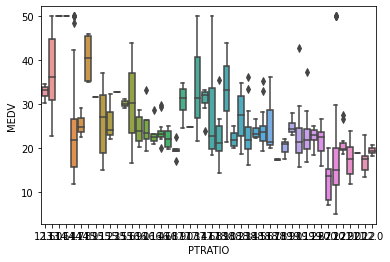

In [27]:

sns.boxplot(x = 'PTRATIO', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='B', ylabel='MEDV'>

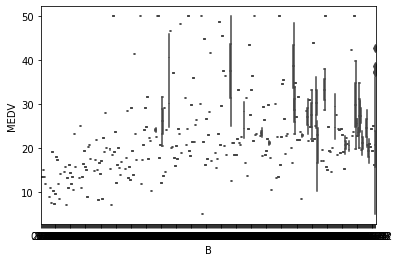

In [28]:

sns.boxplot(x = 'B', y = 'MEDV', data =  f)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

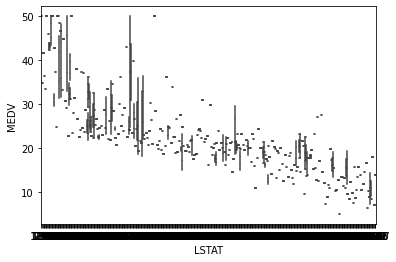

In [29]:

sns.boxplot(x = 'LSTAT', y = 'MEDV', data =  f)
